## **Song Streams prediction**

**Imports**

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import joblib

**DataSet**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/spotify_dataset.csv')  
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


**Preprocessing**

In [5]:
data=data.drop(['Index','Song Name','Song ID','Week of Highest Charting','Weeks Charted'],axis=1)

In [6]:
data.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Streams                      0
Artist                       0
Artist Followers             0
Genre                        0
Release Date                 0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [7]:
data.dtypes

Highest Charting Position     int64
Number of Times Charted       int64
Streams                      object
Artist                       object
Artist Followers             object
Genre                        object
Release Date                 object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

converting objects

In [8]:
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')

In [9]:
data.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Streams                       object
Artist                        object
Artist Followers             float64
Genre                         object
Release Date                  object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object

removing coma b/w int in streams

In [10]:
data['Streams'][1]

'47,248,719'

In [11]:
data['Streams']=pd.to_numeric(data['Streams'].str.replace(",", ""))
data['Streams'][1]

47248719

extracting month from date

In [12]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['month']=data['Release Date'].dt.month

data=data.drop('Release Date',axis=1)
data.head(2)

,Highest Charting Position,Number of Times Charted,Streams,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,48633449,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,B,12.0
1,2,3,47248719,The Kid LAROI,2230022.0,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,C#/Db,7.0


In [13]:
data.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Streams                       0
Artist                        0
Artist Followers             11
Genre                         0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
month                        11
dtype: int64

drop null values

In [14]:
data=data.dropna()
data.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Streams                      0
Artist                       0
Artist Followers             0
Genre                        0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
month                        0
dtype: int64

LabelEncoding

In [15]:
le_Artist=LabelEncoder()
le_Genre=LabelEncoder()
le_Chord=LabelEncoder()

data['Artist']=le_Artist.fit_transform(data['Artist'])
data['Genre']=le_Genre.fit_transform(data['Genre'])
data['Chord']=le_Chord.fit_transform(data['Chord'])

data.head(2)

,Highest Charting Position,Number of Times Charted,Streams,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,48633449,469,3377762.0,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,2,12.0
1,2,3,47248719,643,2230022.0,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,4,7.0


**X, Y Split**

In [22]:
x = data.drop(['Streams'],axis=1)
y = data['Streams']

**Scaling**

In [23]:
scaler =MinMaxScaler()
x=scaler.fit_transform(x)

**visualization**

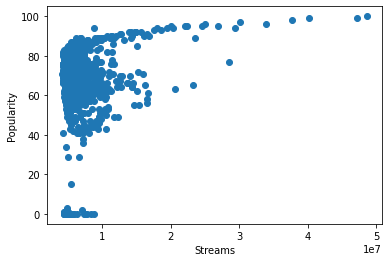

In [ ]:
plt.xlabel('Streams')
plt.ylabel('Popularity')
plt.scatter(data['Streams'],data['Popularity'])

<Axes: title={'center': 'Top in Loudness'}, xlabel='Streams', ylabel='Popularity'>

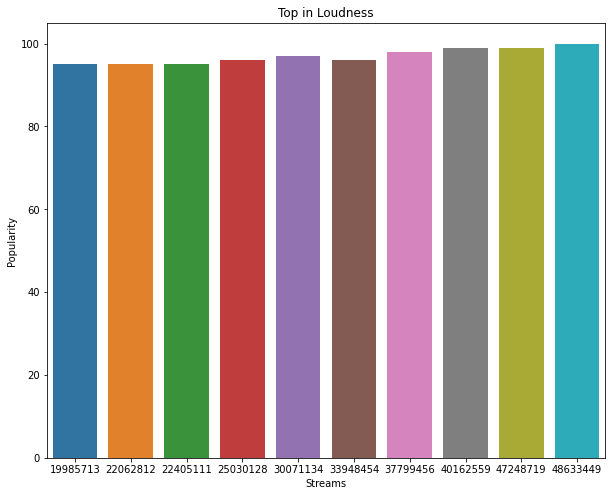

In [ ]:
sort=data.sort_values(by=['Popularity'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Loudness')
sns.barplot(x='Streams',y='Popularity',data=sort.head(10))

**Correlation**

<Axes: >

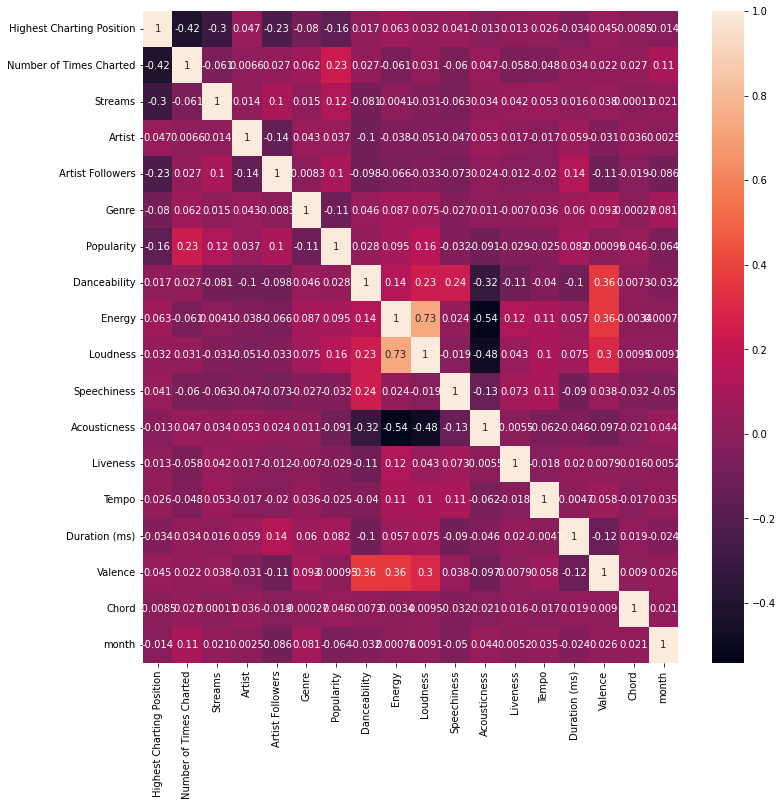

In [ ]:
c=data.corr()
plt.figure(figsize=[12,12])
sns.heatmap(c,annot=True)

In [ ]:
print(data['Highest Charting Position'].corr(data['Streams']))
print(data['Number of Times Charted'].corr(data['Streams']))
print(data['Artist'].corr(data['Streams']))
print(data['Artist Followers'].corr(data['Streams']))

print('***************')
print(data['Genre'].corr(data['Streams']))
print(data['Popularity'].corr(data['Streams']))
print(data['Danceability'].corr(data['Streams']))
print(data['Energy'].corr(data['Streams']))

print('**************')
print(data['Loudness'].corr(data['Streams']))
print(data['Speechiness'].corr(data['Streams']))
print(data['Acousticness'].corr(data['Streams']))
print(data['Liveness'].corr(data['Streams']))

print('*************')
print(data['Tempo'].corr(data['Streams']))
print(data['Duration (ms)'].corr(data['Streams']))
print(data['Valence'].corr(data['Streams']))
print(data['Chord'].corr(data['Streams']))
print(data['month'].corr(data['Streams']))


-0.29544231571147883
-0.060542175109237525
0.013889318709031609
0.10325112188366634
***************
0.015265255788443705
0.12318389252867995
-0.08129107688993267
0.004144561735711903
**************
-0.031154976931381185
-0.06261970586474305
0.03405411998496786
0.04210545702254553
*************
0.05345842982884896
0.015963534784082335
0.038381046068067255
0.00011414285666985081
0.02062303028193316


final feature selection based on correlation

0.001

In [18]:
data=data.drop(['Energy','Chord'],axis=1)

< 0.03

In [19]:
data=data.drop(['Artist','Genre','Duration (ms)','month'],axis=1)

0.03

In [20]:
data=data.drop(['Loudness','Acousticness','Valence'],axis=1)

< 0.05

In [21]:
data=data.drop(['Liveness'],axis=1)

In [34]:
#data.head(1)

**Hyperparameter turning**

In [ ]:
model_params={'AdaBoostRegressor':{'model':AdaBoostRegressor(),'params':{}},
              'GradientBoostingRegressor':{'model':GradientBoostingRegressor(),'params':{}},
              'XGBRFRegressor':{'model':XGBRFRegressor(),'params':{}}}

In [ ]:
scores = []
models = ['AdaBoostRegressor','GradientBoostingRegressor','XGBRFRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'AdaBoostRegressor',
  'best_score': -1.050387169423829,
  'best_params': {}},
 {'model': 'GradientBoostingRegressor',
  'best_score': 0.3740140694463586,
  'best_params': {}},
 {'model': 'XGBRFRegressor',
  'best_score': 0.32099239193912094,
  'best_params': {}}]

other models

In [ ]:
model_params = {'DecisionTreeRegressor':{'model':DecisionTreeRegressor(),'params':{'max_depth':[3,4,5,6]}},
               'RandomForestRegressor':{'model':RandomForestRegressor(),'params':{'n_estimators':[5,10,15,20],'max_depth':[6,7,8,9,10,11,12,13,14,15,20,25]}}}
                                                                             
                                                      
        

In [ ]:
scores = []
models = ['DecisionTreeRegressor','RandomForestRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.15951021226211187,
  'best_params': {'max_depth': 5}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.4312540380580298,
  'best_params': {'max_depth': 14, 'n_estimators': 10}}]

**train test split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

**Model**

In [ ]:
RandomForest=RandomForestRegressor( n_estimators=8,random_state=10,)
model=RandomForest.fit(x_train,y_train)
model.score(x_test,y_test)

0.7998160246721309

In [ ]:
GrdBoost=GradientBoostingRegressor()
GrdBoost_model=GrdBoost.fit(x_train,y_train)
GrdBoost_model.score(x_test,y_test)

0.75489119473297

In [ ]:
XGBR=XGBRFRegressor()
xgb_model=XGBR.fit(x_train,y_train)
xgb_model.score(x_test,y_test)

0.7192095968143482

**prediction**

In [ ]:
x_test[5]

array([0.74371859, 0.09219858, 0.67564298, 0.84      , 0.77349398,
       0.03531599, 0.36106941])

In [ ]:
model.predict([x_test[5]])

array([4969598.25])

**saving model**

In [ ]:
import joblib
joblib.dump(model,'Streams_model')  

['Streams_model']

Reloding the model

In [27]:
joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/Streams_model') 
joblib_reloaded.predict([[0.74371859, 0.09219858, 0.67564298, 0.84      , 0.77349398,0.03531599, 0.36106941]])

array([4969598.25])

**function for prediction**

In [30]:
def prediction(input):
  joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/Streams_model') 
  streams=joblib_reloaded.predict([input])
  print(int(streams))

In [31]:
input=0.74371859, 0.09219858, 0.67564298, 0.84      , 0.77349398,0.03531599, 0.36106941
prediction(input)

4969598


**Function for predicting from non-preprocessed data**

In [36]:
def pred(Position,Times_Charted,	Followers, Popularity, Danceability, Speechiness, Tempo):
  values=scaler.transform([[Position,Times_Charted,	Followers, Popularity, Danceability, Speechiness, Tempo]])
  joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/Streams_model')  
  result=joblib_reloaded.predict(values)
  result=round(result[0])
  print('Predicted streams for the song is {}  ' .format(result))

In [ ]:
pred(1, 8, 48633449, 100,	0.714,	0.0504,	134.002)

In [39]:
#data.head()